# Part1. EDA

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


In [2]:
data = pd.read_csv('/kaggle/input/titanic/train.csv')

# Check basic information
display(data.head())
display(data.describe())
data.info()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
# Check Null values
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- Age, Cabin, Embarked columns have null values

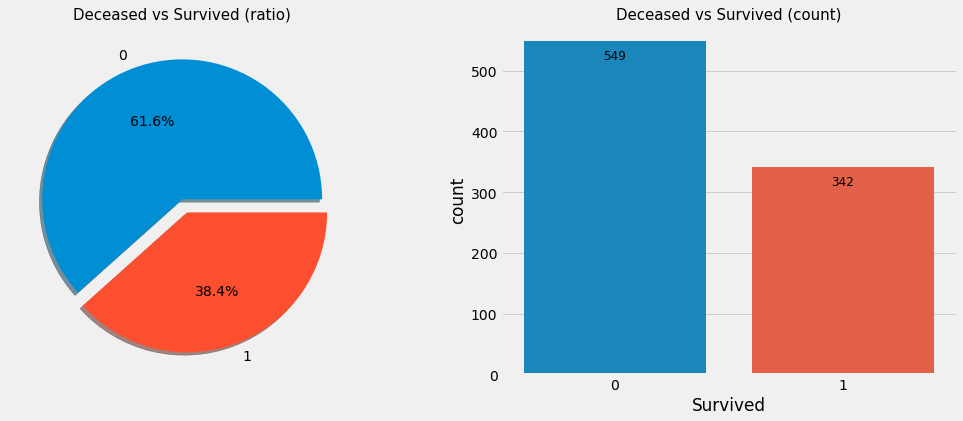

In [4]:
# Check data imbalance
data.Survived
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
data.Survived.value_counts().plot.pie(autopct='%.1f%%', explode=[0, 0.1], ax=ax[0], shadow=True)
ax[0].set_title('Deceased vs Survived (ratio)', size=15)
ax[0].set_ylabel('')

sns.countplot(data.Survived, ax=ax[1])
ax[1].set_title('Deceased vs Survived (count)', size=15)
for tmp_x, tmp_y in data.Survived.value_counts().reset_index().values:
    ax[1].annotate(tmp_y, (tmp_x-0.05, tmp_y-30), size=12)

plt.show()

- Out of 891 passengers, only 38.4% survived

## 1) Analysis of the features
## Sex (Categorical)

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

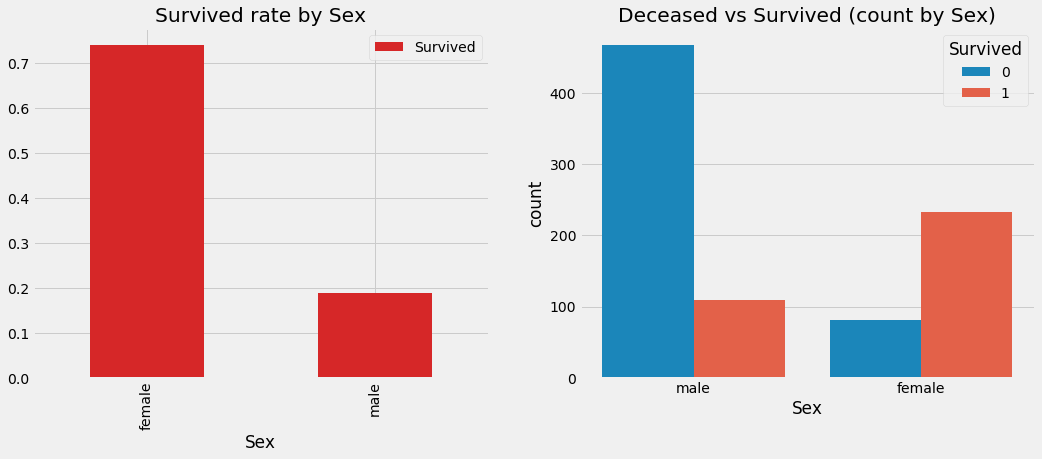

In [5]:
display(data.groupby(['Sex', 'Survived'])['Survived'].count())

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
# data[data.Survived == 1].Sex.value_counts(normalize=True).plot.bar(ax=ax[0])
data.groupby(['Sex']).Survived.mean().plot.bar(ax=ax[0], color='tab:red')
ax[0].set_title('Survived rate by Sex')
ax[0].legend()

sns.countplot(x='Sex', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Deceased vs Survived (count by Sex)')

plt.show()

- The survived rate of females is more than 70% while the survived rate of males is less than 20%
- The number of males is much larger than that of females. Still, the number of survived females is almost twice the number of survived males.

## Pclass (ordinal)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


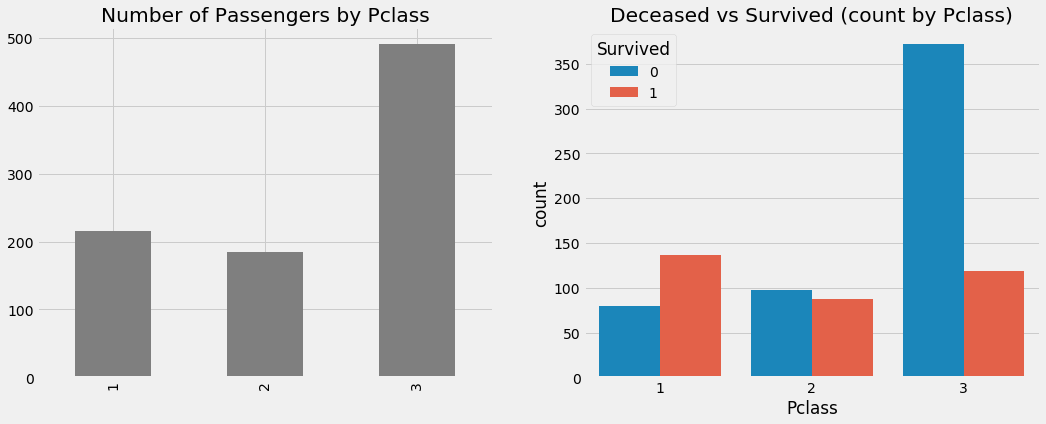

In [6]:
display(pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap='summer_r'))

fig, ax = plt.subplots(1, 2, figsize=(16, 6))

data.Pclass.value_counts().sort_index().plot.bar(color='tab:gray', ax=ax[0])
ax[0].set_title('Number of Passengers by Pclass')

sns.countplot('Pclass', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Deceased vs Survived (count by Pclass)')

plt.show()

- The number of passengers in Pclass 3 was the largest among Pclass 1 to 3. However, The number of survived passengers in Pclass 1 was the largest.
- The survival rate was highest in Pclass 1, and lowest in Pclass 3

## Sex and Pclass together

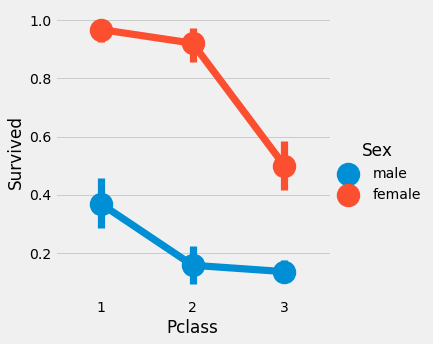

In [7]:
display(pd.crosstab([data.Sex, data.Survived], data.Pclass, margins=True).style.background_gradient(cmap='summer_r'))

sns.catplot(x='Pclass', y='Survived', hue='Sex', data=data, kind='point')
plt.show()

- the survived rate of females from any Pclass was higher than that of males from any class. Even females from Pclass 3 was more likely to survive than males from Pclass 1
- Pclass is also an important feature in predicting survival

## Age (Continuous)

In [8]:
print(f'Oldest passenger was {data.Age.max()} Years old')
print(f'Youngest passenger was {data.Age.min()} Years old')
print(f'Average age of all passengers was {data.Age.mean():.2f}')

Oldest passenger was 80.0 Years old
Youngest passenger was 0.42 Years old
Average age of all passengers was 29.70


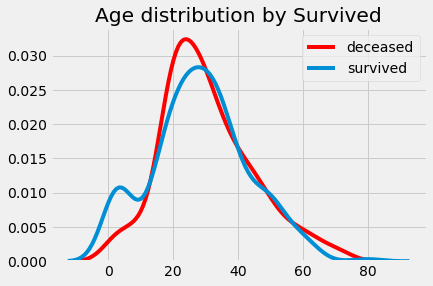

In [9]:
sns.kdeplot(data[data.Survived==0].Age, color='r', label='deceased')
sns.kdeplot(data[data.Survived==1].Age, label='survived')
plt.title('Age distribution by Survived')
plt.show()

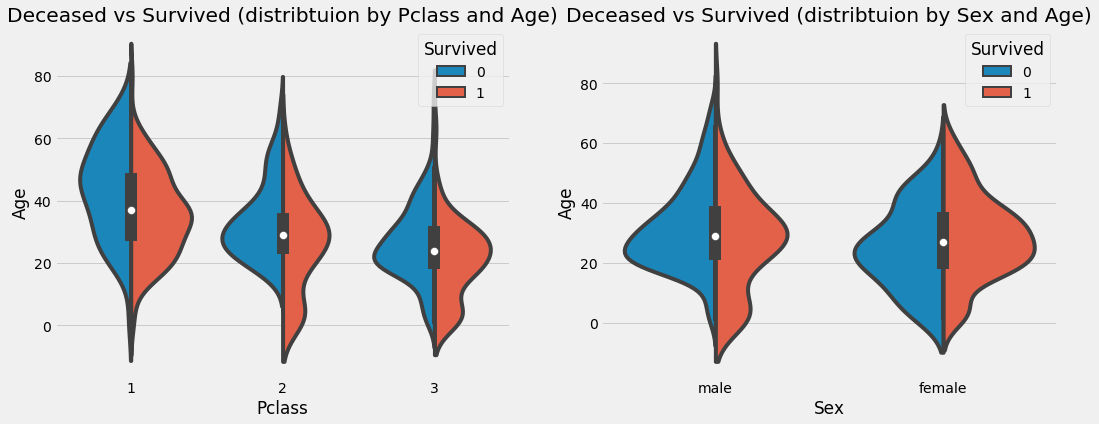

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

sns.violinplot(x='Pclass', y='Age', hue='Survived', data=data, split=True, ax=ax[0])
ax[0].set_title('Deceased vs Survived (distribtuion by Pclass and Age)')

sns.violinplot(x='Sex', y='Age', hue='Survived', data=data, split=True, ax=ax[1])
ax[1].set_title('Deceased vs Survived (distribtuion by Sex and Age)')

plt.show()

- The higher the Pclass was, the more number of old people were found.
- In Pclass 1, people aged between 40-60 died the most. In Pclass 2, it was between 20-40. And in Pclass 3, it was between 20-30.
- The survival rate of childern under age 10 seems quite high, but that of old people of each Pclass seems relatively low.
- The age range of males was broader than that of females.
- The survival rate of male childern seems higher than female children, and the survival rate of female seniors seems higher than male seniors.

## Name (Categorical) → Filling NaN in Age
- There are null values in Age feature. The name(more precisely, initials) of each person can be used for filling them.
- Some rare initials will be replaced with more common ones.

In [11]:
data['Initial'] = ''
for i in data:
    data['Initial'] = data['Name'].str.extract('([A-Za-z]+)\.')

pd.crosstab(data['Initial'], data['Sex']).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [12]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],
                        inplace=True)

data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [13]:
fill_ages_dict = dict(data.groupby('Initial')['Age'].mean().round().astype(int).reset_index().values)

for key, val in fill_ages_dict.items():
    data.loc[(data['Age'].isna())&(data['Initial'] == key), 'Age'] = val

data['Age'].isna().any()

False

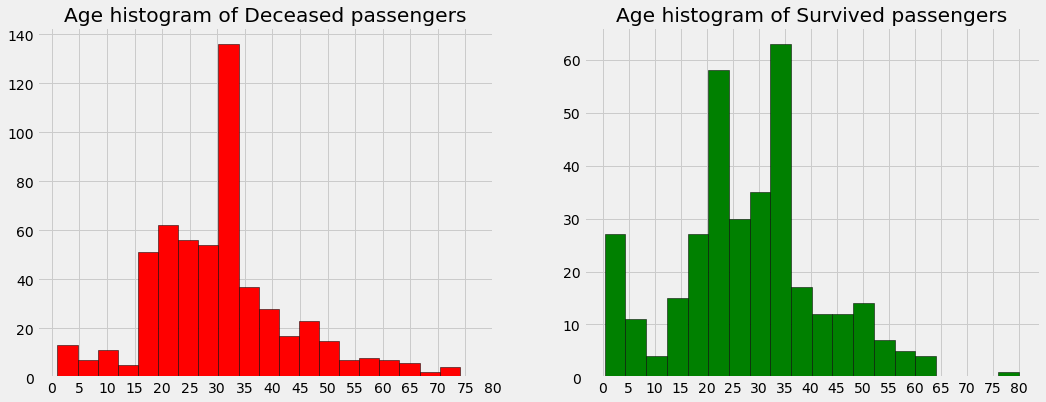

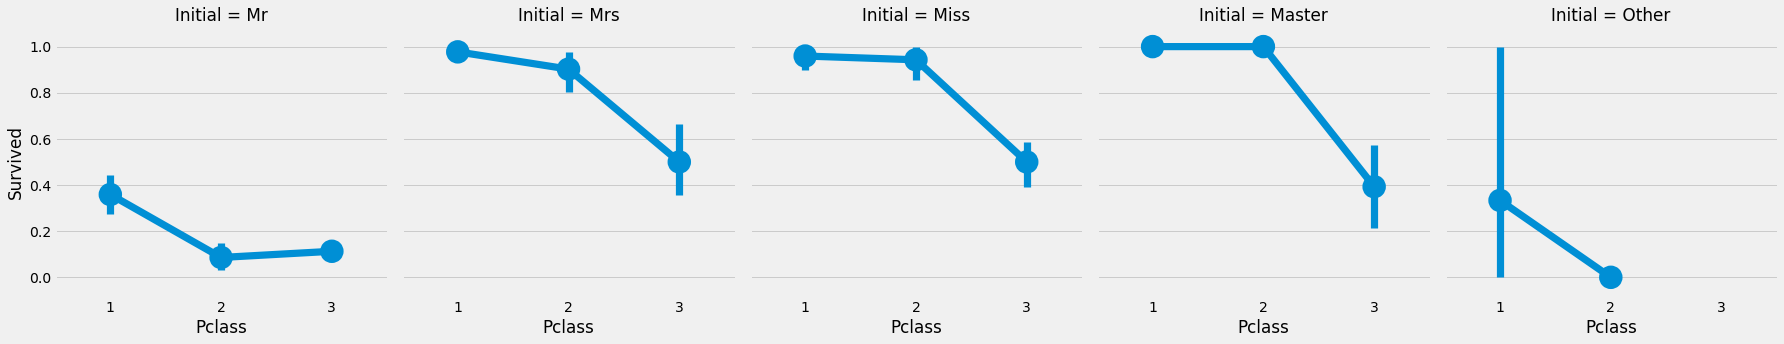

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(16,6))

ax[0].hist(data[data.Survived == 0]['Age'], bins=20, edgecolor='k', color='red')
ax[0].set_title('Age histogram of Deceased passengers')
ax[0].set_xticks(range(0, 85, 5))

ax[1].hist(data[data.Survived == 1]['Age'], bins=20, edgecolor='k', color='green')
ax[1].set_title('Age histogram of Survived passengers')
ax[1].set_xticks(range(0, 85, 5))

plt.show()


sns.catplot(x='Pclass', y='Survived', col='Initial', data=data, kind='point')
plt.show()

- children under 5 were saved in large numbers. (Woman & child first policy)
- The oldest passenger(80 yrs old) was saved.
- Maximum number of deaths was in the age group 30-35.
- The Woman & child first policy holds true irrespective of Pclass

## Embarked (Categorical)

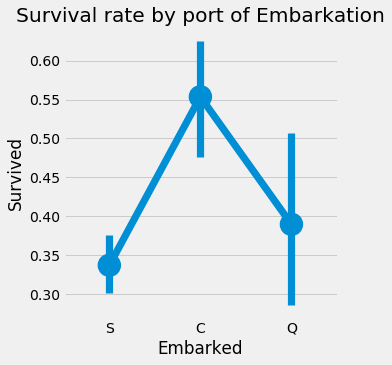

In [15]:
display(pd.crosstab([data.Embarked, data.Pclass], [data.Sex, data.Survived], margins=True).style.background_gradient(cmap='summer_r'))

sns.catplot('Embarked', 'Survived', data=data, kind='point')
plt.title('Survival rate by port of Embarkation')
plt.show()

- Survival rate is lowest for port S and highest for port C.
- The survival rate of females from port S is quite low. The ratio of Pclass 1 is quite high for port C. Those facts possibly contributed to the difference of survival rate between port categories.


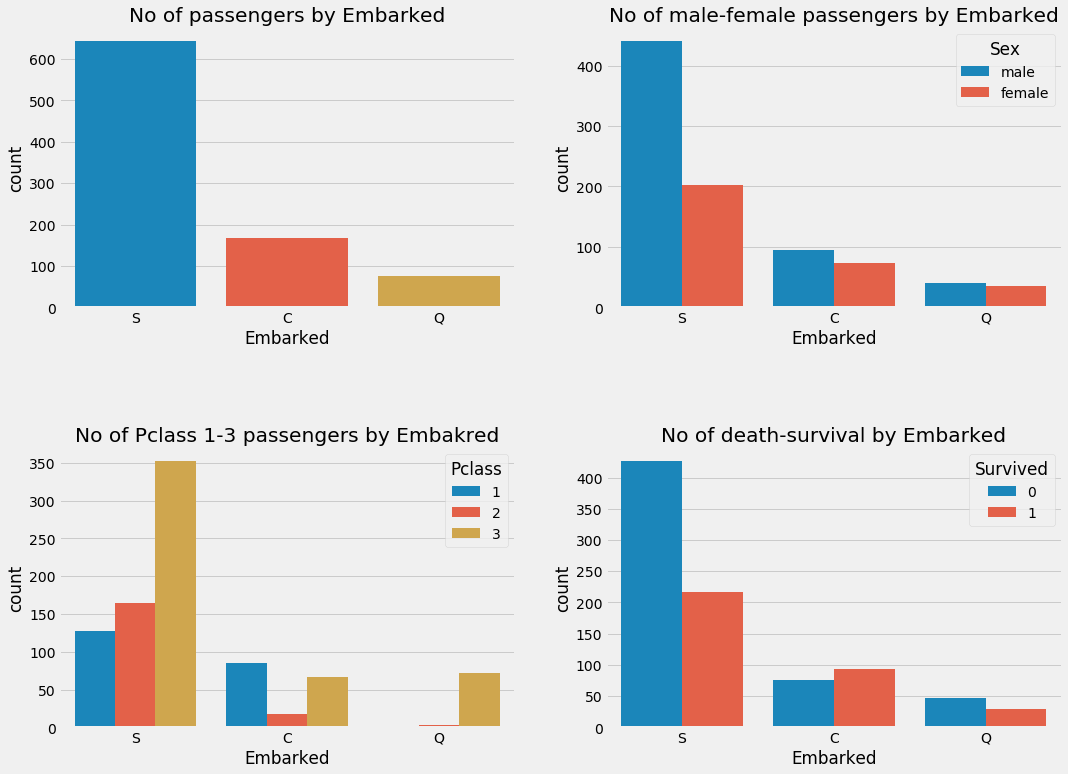

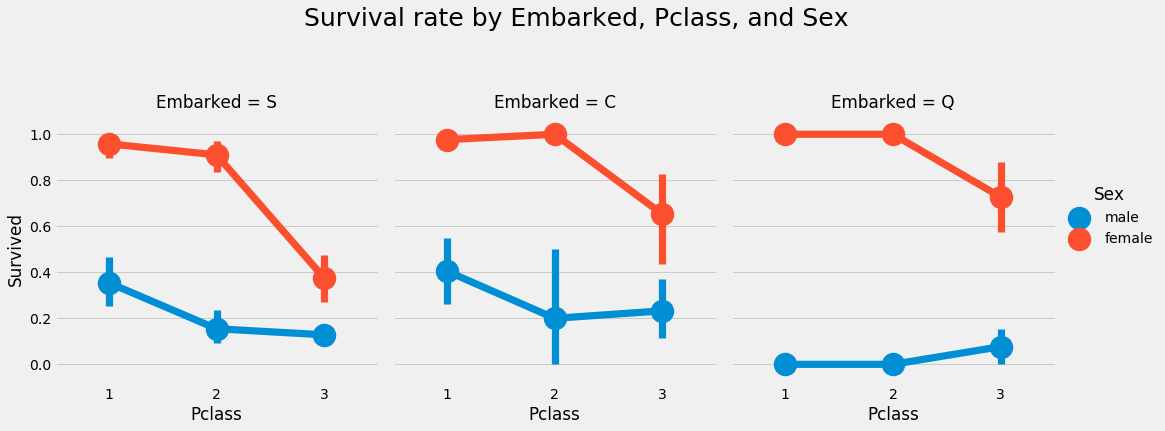

In [16]:
# Countplots
fig, ax = plt.subplots(2, 2, figsize=(16, 12))
ax = ax.ravel()

sns.countplot(data.Embarked, ax=ax[0])
ax[0].set_title('No of passengers by Embarked')

sns.countplot(data.Embarked, hue=data.Sex, ax=ax[1])
ax[1].set_title('No of male-female passengers by Embarked')

sns.countplot(data.Embarked, hue=data.Pclass, ax=ax[2])
ax[2].set_title('No of Pclass 1-3 passengers by Embakred')

sns.countplot(data.Embarked, hue=data.Survived, ax=ax[3])
ax[3].set_title('No of death-survival by Embarked')

plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()


# Comparison between subgroups
sns.catplot('Pclass', 'Survived', hue='Sex', col='Embarked', data=data, kind='point')
plt.suptitle('Survival rate by Embarked, Pclass, and Sex', y=1.20, size=25)
plt.show()

- Majority of passengers are from port S. Also, majority of passengers from port S were in Pclass 3.
- Almost all passengers from port Q were in Pclass 3.
- The survival rate of females from port S was lower than those from other ports(C, Q) in each Pclass.
- The survival rate of males in Pclass 3 was lowest for those from port Q

## Filling NaN in Embarked
- The majority of passengers were from port S, so I will fill null values in Embarked as S.

In [17]:
data['Embarked'] = data['Embarked'].fillna('S')

data['Embarked'].isna().any()

False

## SibSip (Discrete)
- Sib(Sibling) : brother, sister, stepbrother, stepsister

- Sp(Spouse) : husband, wife

In [18]:
display(pd.crosstab(data.Survived, data.SibSp).style.background_gradient(cmap='summer_r'))
display(pd.crosstab(data.Pclass, data.SibSp).style.background_gradient(cmap='summer_r'))
display(pd.crosstab(data.Sex, data.SibSp).style.background_gradient(cmap='summer_r'))

SibSp,0,1,2,3,4,5,8
Survived,,,,,,,
0,398,97,15,12,15,5,7
1,210,112,13,4,3,0,0


SibSp,0,1,2,3,4,5,8
Pclass,,,,,,,
1,137,71,5,3,0,0,0
2,120,55,8,1,0,0,0
3,351,83,15,12,18,5,7


SibSp,0,1,2,3,4,5,8
Sex,,,,,,,
female,174,106,13,11,6,1,3
male,434,103,15,5,12,4,4


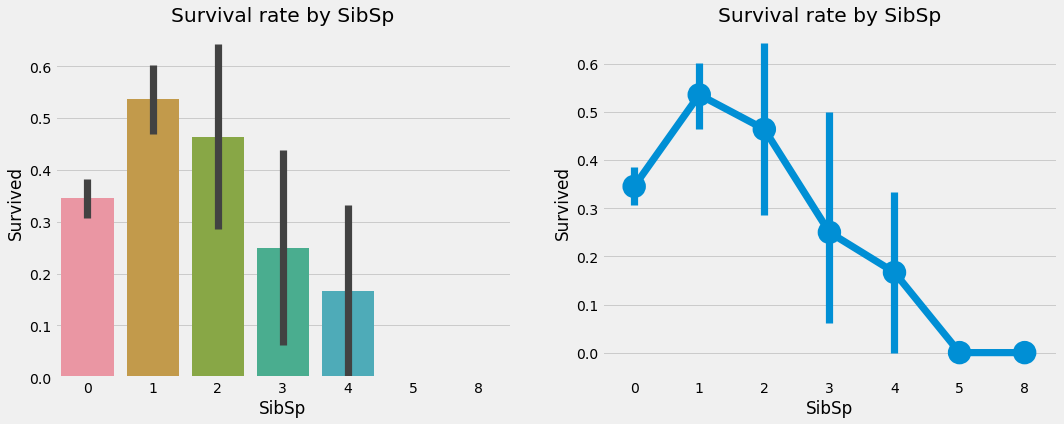

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(16,6))

sns.barplot('SibSp', 'Survived', data=data, ax=ax[0])
ax[0].set_title('Survival rate by SibSp')

sns.pointplot('SibSp', 'Survived', data=data, ax=ax[1])
ax[1].set_title('Survival rate by SibSp')

plt.show()

- SibSp 1 is the only group whose survival rate is over a half (no. of survival is more than no. of death)
- The more number of SibSP a passenger has, the less likely s/he would survive.
- The ratio of Pclass 1 and the ratio of females are relatively high in SibSp 1. That would explain why the survival rate of SibSp 1 group is high.
- There were 30 people in large families(more than 3 ppl), and all of them were in Pclass 3. Unfortunately, most of them deceased.

## Parch (Discrete)
- number of Parents or Children onboard

In [20]:
display(pd.crosstab(data.Survived, data.Parch).style.background_gradient(cmap='summer_r'))
display(pd.crosstab(data.Pclass, data.Parch, margins=True).style.background_gradient(cmap='summer_r'))
display(pd.crosstab(data.Sex, data.Parch).style.background_gradient(cmap='summer_r'))

Parch,0,1,2,3,4,5,6
Survived,,,,,,,
0,445,53,40,2,4,4,1
1,233,65,40,3,0,1,0


Parch,0,1,2,3,4,5,6,All
Pclass,,,,,,,,
1,163,31,21,0,1,0,0,216
2,134,32,16,2,0,0,0,184
3,381,55,43,3,3,5,1,491
All,678,118,80,5,4,5,1,891


Parch,0,1,2,3,4,5,6
Sex,,,,,,,
female,194,60,49,4,2,4,1
male,484,58,31,1,2,1,0


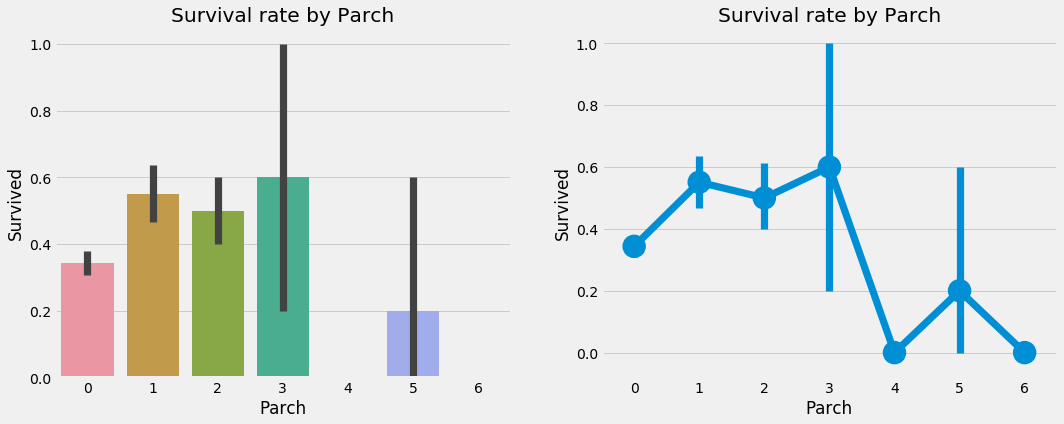

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

sns.barplot('Parch', 'Survived', data=data, ax=ax[0])
ax[0].set_title('Survival rate by Parch')

sns.pointplot('Parch', 'Survived', data=data, ax=ax[1])
ax[1].set_title('Survival rate by Parch')

plt.show()

- passengers with 1~2 parents/children were most likely to survive. This might be because the survival rate of children is high.
- The ratio of females in Parch 1~3 was relatively higher.